In [1]:
# Quelques imports
import json
import pandas as pd
import matplotlib.pyplot as plt
import time

#Lecture du fichier
file = "Historique des positions raphael 140218.json"
df = pd.read_json(file)
#print(df)

donnee=df.get("locations")
#print(donnee)

#Récupération des latitudes, longitudes et des dates
lat=[donnee[0]["latitudeE7"]/1e7]
long=[donnee[0]["longitudeE7"]/1e7]
temps=[donnee[0]["timestampMs"]]

##Version d'obtention brute
#for i in range(len(donnee)):
#    lat.append(donnee[i]["latitudeE7"]/1e7)
#    long.append(donnee[i]["longitudeE7"]/1e7)
#    temps.append(donnee[i]["timestampMs"])

##Version nettoyage par différence de lat/long
for i in range(1,len(donnee)):
    la=donnee[i]["latitudeE7"]/1e7
    lo=donnee[i]["longitudeE7"]/1e7
    t=donnee[i]["timestampMs"]
    t1=donnee[i-1]["timestampMs"]
    t,t1=time.gmtime(float(t))[5],time.gmtime(float(t1))[5]
    if abs(t-t1)<=1 and (la-donnee[i-1]["latitudeE7"]/1e7)<=1e-8 and (lo-donnee[i-1]["longitudeE7"]/1e7)<=1e-8:
        lat.append(la)
        long.append(lo)
        temps.append(t)
    elif abs(t-t1)>=5 and (la-donnee[i-1]["latitudeE7"]/1e7)>=0.005 and (lo-donnee[i-1]["longitudeE7"]/1e7)<=0.001:
        lat.append(la)
        long.append(lo)
        temps.append(t)
# Get current size
fig_size = plt.rcParams["figure.figsize"]

[4.7701347, 4.7702638, 4.7702828, 4.7702216, 4.7699922, 4.7701272, 4.7703652, 4.7701641, 4.7701655, 4.7701655, 4.7701655, 4.7707833, 4.770975, 4.770975, 4.7709717, 4.7702693, 4.7701405, 4.7702161, 4.7704544, 4.7704544, 4.7703373, 4.7702177, 4.7700156, 4.77024, 4.7697967, 4.7700842, 4.770194, 4.7701847]


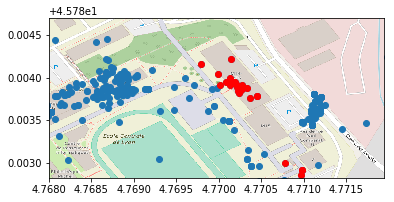

In [2]:
import matplotlib.pyplot as plt    

datafile4 = 'M14_15_16.png'
img4 = plt.imread(datafile4)
plt.scatter(long,lat,zorder=1)
x1=[]
y1=[]

#for i in range(len(lat)):  
    #if long[i]>4.766 and long[i]<4.772 and lat[i]>45.783 and lat[i]<45.78419:  
        #x1.append(long[i])  
        #y1.append(lat[i]) 

for i in range(len(lat)):
    if lat[i]>((-1.2778)*(long[i])+51.879) and lat[i]<((-1.6)*(long[i])+53.41658) and lat[i]<(0.175*(long[i])+44.9496525) and lat[i]>(0.5*(long[i])+43.3909):
        x1.append(long[i])  
        y1.append(lat[i]) 
    
#plt.plot(long,lat,'bo')  
print(x1)
plt.scatter(x1,y1,color='red') 
plt.imshow(img4,zorder=0,extent = [4.7680,4.77194,45.78282,45.7847])


plt.show()